### KBO 홈페이지에서 기록 데이터 수집하기

**kbo 홈페이지

https://www.koreabaseball.com/Default.aspx

In [ ]:
!pip3 install beautifulsoup4 -U
from bs4 import BeautifulSoup
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 4.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
answer = []
year=[1980,1990,2000,2010,2020]
for i in year:
  html = requests.get(f"https://www.koreabaseball.com/Record/History/Team/Record.aspx?startYear={i}&halfSc=T").text
  soup = BeautifulSoup(html, "html.parser")

  string = "div.sub-content > table.tData > tbody > tr"
  temp = soup.select(string)
 
  for line in temp:
    res_detail = {}
    td = line.find_all('td')
    th = line.find_all('th')
    if len(td) > 5 :
      res_detail['name']=th[0].text
      res_detail['타율']=td[4].text
      res_detail['평균자책점']=td[5].text
      res_detail['승률']=td[6].text
      answer.append(res_detail)




In [ ]:
print(answer)

[{'name': 'OB     베어스', '타율': '0.283', '평균자책점': '3.20', '승률': '0.700'}, {'name': '삼성   라이온즈', '타율': '0.266', '평균자책점': '2.70', '승률': '0.675'}, {'name': 'MBC    청룡', '타율': '0.282', '평균자책점': '3.51', '승률': '0.575'}, {'name': '해태   타이거즈', '타율': '0.261', '평균자책점': '3.79', '승률': '0.475'}, {'name': '롯데   자이언츠', '타율': '0.256', '평균자책점': '3.95', '승률': '0.388'}, {'name': '삼미   슈퍼스타즈', '타율': '0.240', '평균자책점': '6.23', '승률': '0.188'}, {'name': '해태   타이거즈', '타율': '0.268', '평균자책점': '3.17', '승률': '0.556'}, {'name': 'MBC    청룡', '타율': '0.255', '평균자책점': '2.71', '승률': '0.561'}, {'name': '삼미   슈퍼스타즈', '타율': '0.245', '평균자책점': '3.04', '승률': '0.525'}, {'name': '삼성   라이온즈', '타율': '0.263', '평균자책점': '3.42', '승률': '0.479'}, {'name': 'OB     베어스', '타율': '0.259', '평균자책점': '3.52', '승률': '0.444'}, {'name': '롯데   자이언츠', '타율': '0.244', '평균자책점': '3.79', '승률': '0.434'}, {'name': '롯데   자이언츠', '타율': '0.257', '평균자책점': '3.31', '승률': '0.510'}, {'name': '삼성   라이온즈', '타율': '0.270', '평균자책점': '3.35', '승률': '0.550'}, {'name': 'OB   

In [ ]:
import pandas as pd
import numpy as np
# 데이터 프레임으로 변환
res = pd.DataFrame(answer,columns=['name','타율','평균자책점','승률']) 
# 이름 띄어쓰기 제거
res['name'] = res['name'].str.replace(" ","")
# 타율, 평균자책점, 승률 float으로 변환
res1 = res.astype({'타율':np.float,'평균자책점':np.float,'승률':np.float})
# 같은 팀끼리 그룹화
group = res1.groupby('name').mean()

group.to_excel('1982년~2020년 KBO리그 기록.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


### 역대 타자 타율 순위 데이터 수집하기

In [ ]:
hitter = []

html = requests.get("https://www.koreabaseball.com/Record/History/Top/Hitter.aspx").text
soup = BeautifulSoup(html, "html.parser")

string = "div.sub-content > table > tbody > tr"
temp = soup.select(string)
 
for line in temp:
  res_detail = {}
  td = line.find_all('td')
  res_detail['순위']=td[0].text
  res_detail['선수명']=td[1].text
  res_detail['팀명']=td[2].text
  res_detail['기록']=td[3].text
  res_detail['연도']=td[4].text
  hitter.append(res_detail)

In [ ]:
print(hitter)

[{'순위': '1', '선수명': '백인천', '팀명': 'MBC   ', '기록': '0.412', '연도': '1982'}, {'순위': '2', '선수명': '이종범', '팀명': '해태', '기록': '0.393', '연도': '1994'}, {'순위': '3', '선수명': '장효조', '팀명': '삼성', '기록': '0.387', '연도': '1987'}, {'순위': '4', '선수명': '테임즈', '팀명': 'NC', '기록': '0.381', '연도': '2015'}, {'순위': '5', '선수명': '최형우', '팀명': '삼성', '기록': '0.376', '연도': '2016'}, {'순위': '6', '선수명': '장효조', '팀명': '삼성  ', '기록': '0.373', '연도': '1985'}, {'순위': '7', '선수명': '마해영', '팀명': '롯데', '기록': '0.372', '연도': '1999'}, {'순위': '7', '선수명': '박용택', '팀명': 'LG', '기록': '0.372', '연도': '2009'}, {'순위': '9', '선수명': '홍성흔', '팀명': '롯데', '기록': '0.371', '연도': '2009'}, {'순위': '10', '선수명': '서건창', '팀명': '넥센', '기록': '0.370', '연도': '2014'}]


In [ ]:
# 데이터 프레임으로 변환
hitres = pd.DataFrame(hitter,columns=['순위','선수명','팀명','기록','연도'])
hitres.set_index('순위',inplace=True)
hitres.to_excel('역대 타자 타율 기록.xlsx')

### 역대 투수 평균자책점 순위 데이터 수집하기

In [ ]:
# selenium과 chromedriver 설치 및 세팅 
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 34.9 MB/s 
     |████████████████████████████████| 140 kB 77.8 MB/s 
     |████████████████████████████████| 358 kB 98.9 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [91.1 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,534 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 

In [ ]:
# selenium import
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:
# selenium 세팅 (옵션 지정)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')  
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("user-agent=Mozilla/6.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko")

In [ ]:
# webdirver 객체 생성 (=브라우저 띄우기)
driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [ ]:
# 웹페이지 접속
driver.implicitly_wait(5)  
driver.get("https://www.koreabaseball.com/Record/History/Top/Pitcher.aspx")

In [ ]:
# 평균자책점 클릭하기 
selector = "#cphContents_cphContents_cphContents_ddlReocrdGubun > option:nth-child(2)" 
element = driver.find_element(By.CSS_SELECTOR,selector)
element.click()

In [ ]:
# 요소 선택하기 
selector = "div.sub-content > table > tbody > tr"
elements = driver.find_elements(By.CSS_SELECTOR,selector)

In [ ]:
# 요소 내의 값 가져오기
pitcher = []
for element in elements:
  pitcher.append(element.text)  



In [ ]:
# webdriver 종료
driver.quit()

In [ ]:
# 데이터 프레임으로 변환 및 저장
pitchers = pd.DataFrame(pitcher)
pitchers.to_excel('역대 투수 평균자책점 기록.xlsx')

### 태블로를 활용한 데이터 시각화 결과

*링크

https://public.tableau.com/views/_16614808484700/1_1?:language=ko-KR&:display_count=n&:origin=viz_share_link

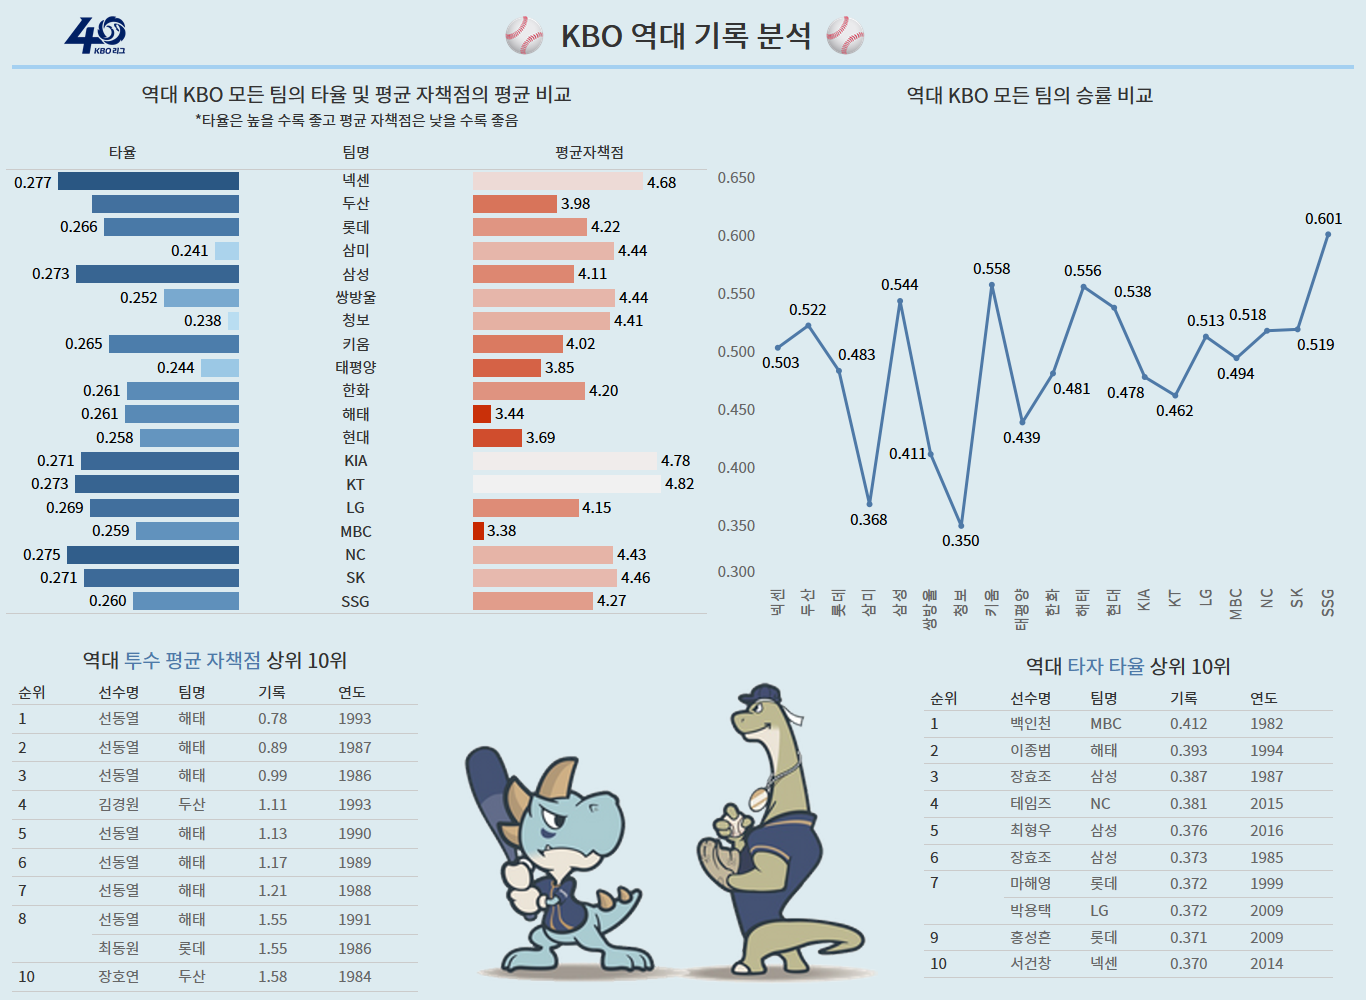